In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

In [3]:
car = pd.read_csv('/content/gdrive/MyDrive/18dcs003_ML/mini-project/train-data.csv')
backup = car.copy()

## what preprocessing required 
- change milage(kmpl), engine(CC), power(bph) to only number
- remove new_price 
- add company name column 
- change name to 3 digits 
- remove null

In [4]:
car_new = ['Name',	'Location',	'Year',	'Kilometers_Driven',	'Fuel_Type',	'Transmission',	'Owner_Type',	'Mileage',	'Engine'	,	'Seats', 'Price']
car = car[car_new]

In [5]:
car['company'] = car['Name'].str.split(' ').str.get(0).str.replace(',','')
car['Name'] = car['Name'].str.split(' ').str.slice(0,3).str.join(' ')
car['Mileage'] = car['Mileage'].str.split(' ').str.get(0)
car['Engine'] = car['Engine'].str.split(' ').str.get(0)

In [6]:
#removing 'Fourth & Above' from Owner_Type as 9 data only there
car = car[car['Owner_Type'] != 'Fourth & Above'].reset_index(drop=True)
#remove car with seats = 0 as it missleads the other data
car = car[car['Seats'] != 0.0].reset_index(drop=True)
# there is only one data with more then 6^6 km so delete it
car = car[car['Kilometers_Driven'] < 6e6].reset_index(drop=True)

In [7]:
#removed all row with null data(it was very few)
car = car.dropna()

In [8]:
car['Mileage'] = car['Mileage'].astype(float)
car['Engine'] = car['Engine'].astype(int)
car['Seats'] = car['Seats'].astype(int)

In [9]:
car = car.reset_index(drop=True)
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,company
0,Maruti Wagon R,Mumbai,2010,72000,CNG,Manual,First,26.60,998,5,1.75,Maruti
1,Hyundai Creta 1.6,Pune,2015,41000,Diesel,Manual,First,19.67,1582,5,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,5,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,7,6.00,Maruti
4,Audi A4 New,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,5,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
5960,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,5,4.75,Maruti
5961,Hyundai Xcent 1.1,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,5,4.00,Hyundai
5962,Mahindra Xylo D4,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,8,2.90,Mahindra
5963,Maruti Wagon R,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,5,2.65,Maruti


In [10]:
car.shape

(5965, 12)

In [11]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5965 entries, 0 to 5964
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5965 non-null   object 
 1   Location           5965 non-null   object 
 2   Year               5965 non-null   int64  
 3   Kilometers_Driven  5965 non-null   int64  
 4   Fuel_Type          5965 non-null   object 
 5   Transmission       5965 non-null   object 
 6   Owner_Type         5965 non-null   object 
 7   Mileage            5965 non-null   float64
 8   Engine             5965 non-null   int64  
 9   Seats              5965 non-null   int64  
 10  Price              5965 non-null   float64
 11  company            5965 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 559.3+ KB


In [12]:
car.describe()

,Year,Kilometers_Driven,Mileage,Engine,Seats,Price
count,5965.000000,5965.000000,5965.000000,5965.000000,5965.000000,5965.000000
mean,2013.395138,57478.155742,18.189554,1620.660184,5.278458,9.499106
std,3.239378,37689.537531,4.514490,600.438234,0.804548,11.189206
min,1998.000000,171.000000,0.000000,624.000000,2.000000,0.440000
25%,2012.000000,33858.000000,15.260000,1198.000000,5.000000,3.500000
50%,2014.000000,53000.000000,18.190000,1493.000000,5.000000,5.650000
75%,2016.000000,72921.000000,21.100000,1984.000000,5.000000,9.950000
max,2019.000000,775000.000000,33.540000,5998.000000,10.000000,160.000000


In [13]:
car.to_csv('/content/gdrive/MyDrive/18dcs003_ML/mini-project/Cleaned Car.csv')

**cleaning done!**

## Model
- Linear Regression
- random forest
- Navie bays



In [29]:
x = car.drop(columns='Price')
y = car['Price']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [32]:
ohe = OneHotEncoder()
ohe.fit(x[['Name','Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'company']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [33]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'company']),remainder="passthrough")

**Linear Regression**

In [34]:
lr = LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)
r2_score(Y_test,y_pred)

0.8367155192879483

In [35]:
pipe.predict(pd.DataFrame([['Hyundai i20 Sportz','Ahmedabad',2015,110000,'Diesel','Manual','First', 20.00, 	1400,	5,'Hyundai']],columns=['Name',	'Location',	'Year',	'Kilometers_Driven',	'Fuel_Type',	'Transmission',	'Owner_Type',	'Mileage',	'Engine',	'Seats',	'company']))

array([6.02146221])

In [36]:
#for slection of car object
pipe.steps[0][1].transformers[0][1].categories[1]

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
       'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
      dtype=object)

**Random Forest**

In [37]:
reg = RandomForestRegressor()
pipe_reg = make_pipeline(column_trans,reg)
pipe_reg.fit(X_train,Y_train)
y_pred_reg = pipe_reg.predict(X_test)
r2_score(Y_test,y_pred_reg)

0.8901124564770716

In [38]:
pipe.predict(pd.DataFrame([['Hyundai i20 Sportz','Ahmedabad',2015,110000,'Diesel','Manual','First', 20.00, 	1400,	5,'Hyundai']],columns=['Name',	'Location',	'Year',	'Kilometers_Driven',	'Fuel_Type',	'Transmission',	'Owner_Type',	'Mileage',	'Engine',	'Seats',	'company']))

array([6.02146221])

In [39]:
#for slection of car object
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Ambassador Classic Nova', 'Audi A3 35', 'Audi A4 1.8',
       'Audi A4 2.0', 'Audi A4 3.0', 'Audi A4 30', 'Audi A4 35',
       'Audi A4 New', 'Audi A6 2.0', 'Audi A6 2.7', 'Audi A6 2.8',
       'Audi A6 2011-2015', 'Audi A6 3.0', 'Audi A6 35',
       'Audi A7 2011-2015', 'Audi A8 L', 'Audi Q3 2.0',
       'Audi Q3 2012-2015', 'Audi Q3 30', 'Audi Q3 35', 'Audi Q5 2.0',
       'Audi Q5 2008-2012', 'Audi Q5 3.0', 'Audi Q5 30', 'Audi Q7 3.0',
       'Audi Q7 35', 'Audi Q7 4.2', 'Audi Q7 45', 'Audi RS5 Coupe',
       'Audi TT 2.0', 'Audi TT 40', 'BMW 1 Series', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 6 Series', 'BMW 7 Series', 'BMW X1 M',
       'BMW X1 sDrive', 'BMW X1 sDrive20d', 'BMW X1 xDrive',
       'BMW X3 xDrive', 'BMW X3 xDrive20d', 'BMW X3 xDrive30d',
       'BMW X5 2014-2019', 'BMW X5 3.0d', 'BMW X5 X5', 'BMW X5 xDrive',
       'BMW X6 xDrive', 'BMW X6 xDrive30d', 'BMW Z4 2009-2013',
       'Bentley Continental Flying', 'Chevrolet Aveo 1.4',
       'Chevrolet Aveo 1.6

**Naive Bayes**

In [40]:
NB = GaussianNB()
pipe_NB = make_pipeline(column_trans,reg)
pipe_NB.fit(X_train,Y_train)
y_pred_NB = pipe_NB.predict(X_test)
r2_score(Y_test,y_pred_NB)

0.8868608289762835

In [43]:
pipe.predict(pd.DataFrame([['Hyundai i20 Sportz','Ahmedabad',2015,110000,'Diesel','Manual','First', 20.00, 	1400,	5,'Hyundai']],columns=['Name',	'Location',	'Year',	'Kilometers_Driven',	'Fuel_Type',	'Transmission',	'Owner_Type',	'Mileage',	'Engine',	'Seats',	'company']))

array([6.02146221])

In [44]:
#for slection of car object
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Ambassador Classic Nova', 'Audi A3 35', 'Audi A4 1.8',
       'Audi A4 2.0', 'Audi A4 3.0', 'Audi A4 30', 'Audi A4 35',
       'Audi A4 New', 'Audi A6 2.0', 'Audi A6 2.7', 'Audi A6 2.8',
       'Audi A6 2011-2015', 'Audi A6 3.0', 'Audi A6 35',
       'Audi A7 2011-2015', 'Audi A8 L', 'Audi Q3 2.0',
       'Audi Q3 2012-2015', 'Audi Q3 30', 'Audi Q3 35', 'Audi Q5 2.0',
       'Audi Q5 2008-2012', 'Audi Q5 3.0', 'Audi Q5 30', 'Audi Q7 3.0',
       'Audi Q7 35', 'Audi Q7 4.2', 'Audi Q7 45', 'Audi RS5 Coupe',
       'Audi TT 2.0', 'Audi TT 40', 'BMW 1 Series', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 6 Series', 'BMW 7 Series', 'BMW X1 M',
       'BMW X1 sDrive', 'BMW X1 sDrive20d', 'BMW X1 xDrive',
       'BMW X3 xDrive', 'BMW X3 xDrive20d', 'BMW X3 xDrive30d',
       'BMW X5 2014-2019', 'BMW X5 3.0d', 'BMW X5 X5', 'BMW X5 xDrive',
       'BMW X6 xDrive', 'BMW X6 xDrive30d', 'BMW Z4 2009-2013',
       'Bentley Continental Flying', 'Chevrolet Aveo 1.4',
       'Chevrolet Aveo 1.6

## analysis
- all analysis graph

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

**Price to Company graph with Fuel type and year**

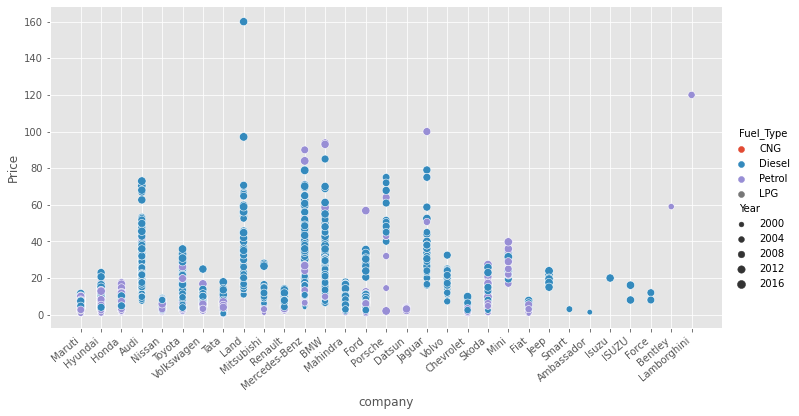

In [ ]:
ax=sns.relplot(x='company',y='Price',data=car,hue='Fuel_Type',size='Year',height=5,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

**Price to Company only**

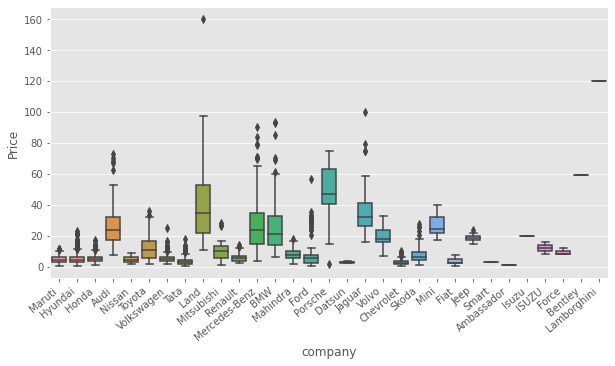

In [ ]:
plt.subplots(figsize=(10,5))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

**Year to price**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.2% of the points cannot be placed; y

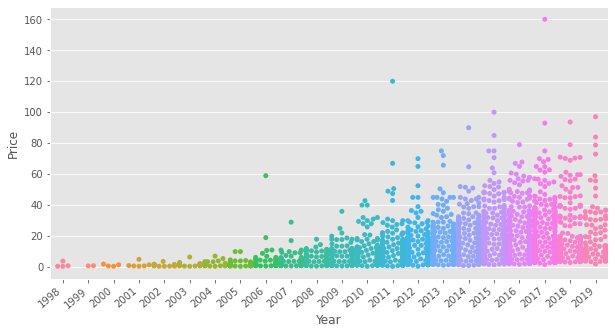

In [ ]:
plt.subplots(figsize=(10,5))
ax=sns.swarmplot(x='Year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 98.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 97.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 96.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.6% of the points cannot be placed; y

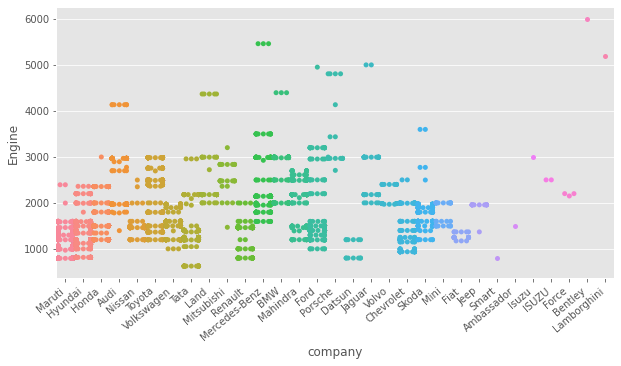

In [ ]:
plt.subplots(figsize=(10,5))
ax=sns.swarmplot(x='company',y='Engine',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

**Price to Kilometers**

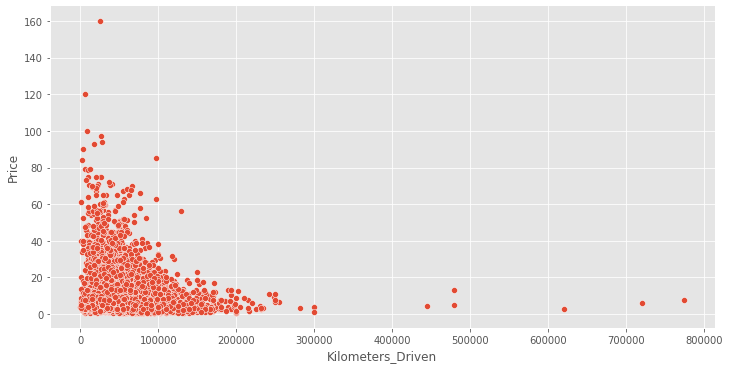

In [ ]:
sns.relplot(x='Kilometers_Driven',y='Price',data=car,height=5,aspect=2)

**price to fuel type**

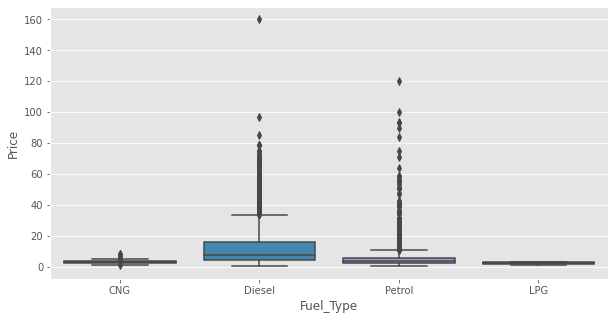

In [ ]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='Fuel_Type',y='Price',data=car)